In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load and Visualize Data

In [10]:
# Load CSVs
train_df = pd.read_csv("ml-model/train.csv")
test_df = pd.read_csv("ml-model/test.csv")

# Basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (800000, 11)
Test shape: (200000, 11)


In [11]:
# Check data types and missing values
print("\nData types and missing values:")
print(train_df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   is_airport_ride  800000 non-null  bool   
 1   distance_km      800000 non-null  float64
 2   duration_min     800000 non-null  float64
 3   hour             800000 non-null  int64  
 4   day_of_week      800000 non-null  int64  
 5   month            800000 non-null  int64  
 6   is_weekend       800000 non-null  bool   
 7   is_night         800000 non-null  bool   
 8   is_holiday       800000 non-null  bool   
 9   passenger_count  800000 non-null  int64  
 10  fare_amount      800000 non-null  float64
dtypes: bool(4), float64(3), int64(4)
memory usage: 45.8 MB
None


In [12]:
# View a sample
print("\nSample rows:")
display(train_df.head())

# Summary statistics
print("\nSummary statistics:")
display(train_df.describe())


Sample rows:


,is_airport_ride,distance_km,duration_min,hour,day_of_week,month,is_weekend,is_night,is_holiday,passenger_count,fare_amount
0,False,3.000650,7.255950,10,3,8,False,False,False,7,11.21
1,False,3.882258,10.793713,19,6,5,True,False,False,6,12.37
2,False,18.596895,48.558148,17,4,2,False,False,False,8,31.80
3,False,3.017300,7.545969,9,5,6,True,False,False,1,7.00
4,True,24.505991,39.200385,14,4,12,False,False,True,6,47.60



Summary statistics:


,distance_km,duration_min,hour,day_of_week,month,passenger_count,fare_amount
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,12.926123,26.428348,12.809722,3.465170,6.625011,4.497822,24.627514
std,7.919818,15.445748,6.353041,1.880198,3.096349,2.291592,12.954207
min,3.000027,5.000000,0.000000,0.000000,1.000000,1.000000,7.000000
25%,5.970309,13.766180,8.000000,2.000000,4.000000,2.000000,13.840000
50%,10.730533,24.112060,13.000000,4.000000,7.000000,4.000000,20.730000
75%,19.684727,35.063176,18.000000,5.000000,9.000000,6.000000,35.360000
max,39.999880,80.000000,23.000000,6.000000,12.000000,8.000000,75.140000


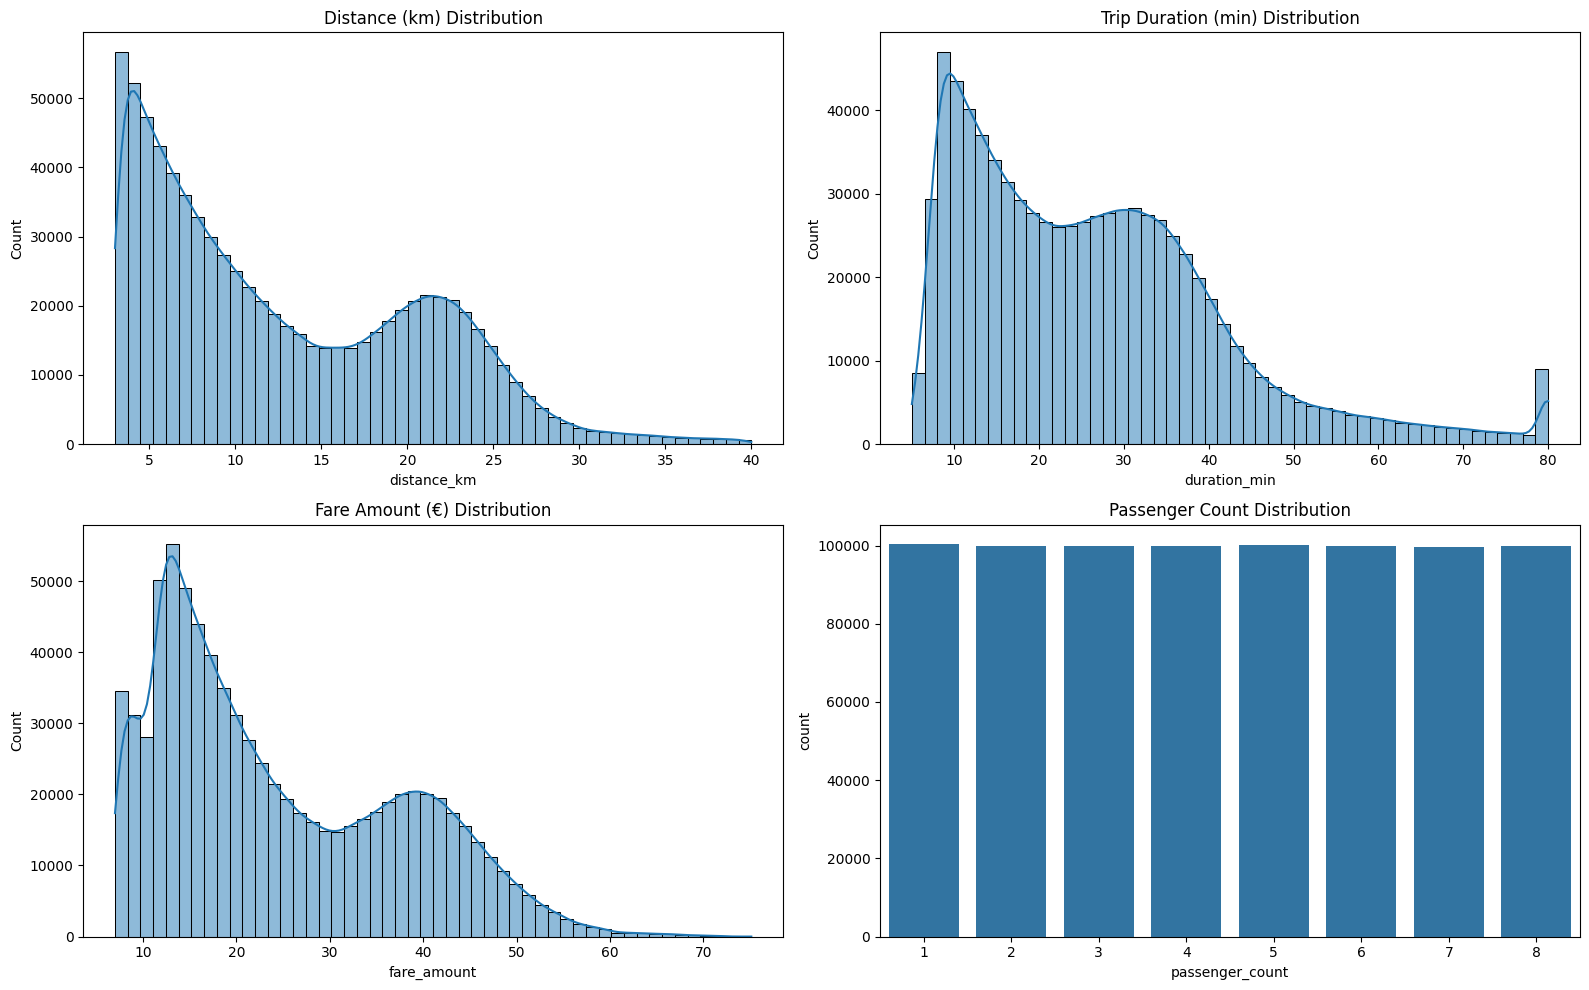

In [13]:
plt.figure(figsize=(16, 10))

# Distance
plt.subplot(2, 2, 1)
sns.histplot(train_df["distance_km"], bins=50, kde=True)
plt.title("Distance (km) Distribution")

# Duration
plt.subplot(2, 2, 2)
sns.histplot(train_df["duration_min"], bins=50, kde=True)
plt.title("Trip Duration (min) Distribution")

# Fare
plt.subplot(2, 2, 3)
sns.histplot(train_df["fare_amount"], bins=50, kde=True)
plt.title("Fare Amount (€) Distribution")

# Passenger count (categorical)
plt.subplot(2, 2, 4)
sns.countplot(x="passenger_count", data=train_df)
plt.title("Passenger Count Distribution")

plt.tight_layout()
plt.show()


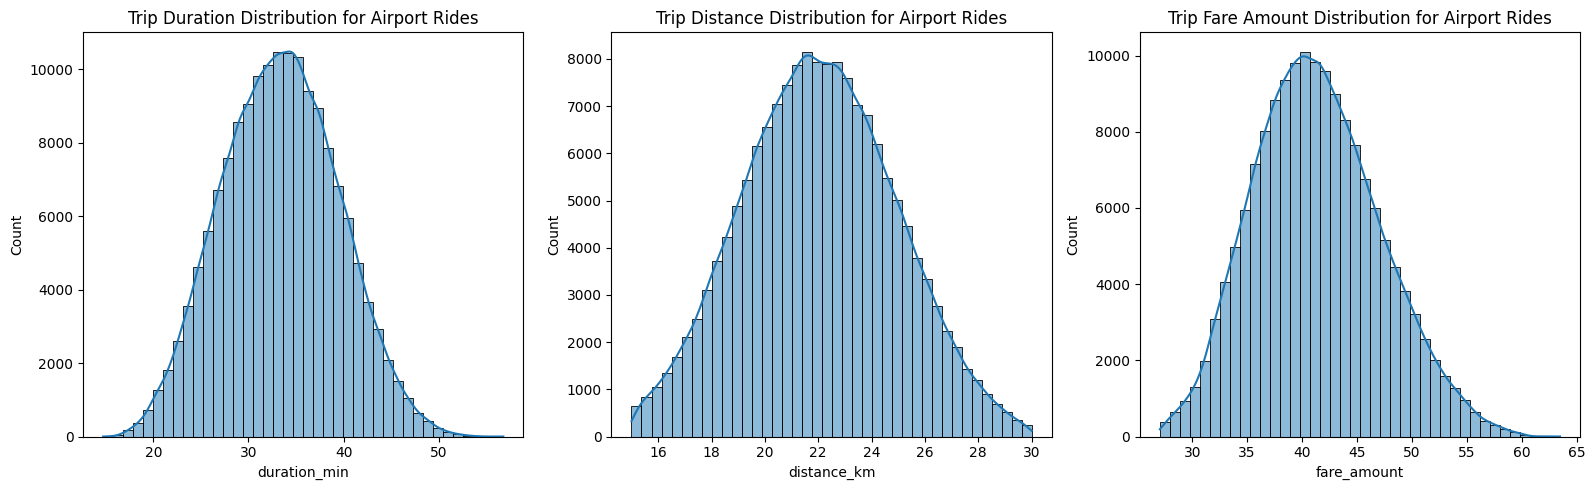

In [6]:
# Filter for airport rides
airport_rides = train_df[train_df["is_airport_ride"] == True]

# Summary of their durations and distances
airport_duration_stats = airport_rides["duration_min"].describe()
airport_distance_stats = airport_rides["distance_km"].describe()
airport_price_stats = airport_rides["fare_amount"].describe()


# Plot
plt.figure(figsize=(16, 5))

# Duration
plt.subplot(1, 3, 1)
sns.histplot(airport_rides["duration_min"], bins=40, kde=True)
plt.title("Trip Duration Distribution for Airport Rides")

# Distance
plt.subplot(1, 3, 2)
sns.histplot(airport_rides["distance_km"], bins=40, kde=True)
plt.title("Trip Distance Distribution for Airport Rides")

# Price
plt.subplot(1, 3, 3)
sns.histplot(airport_rides["fare_amount"], bins=40, kde=True)
plt.title("Trip Fare Amount Distribution for Airport Rides")

plt.tight_layout()
plt.show()

In [7]:
airport_duration_stats

count    160482.000000
mean         33.372448
std           6.073031
min          14.738498
25%          29.020700
50%          33.355043
75%          37.609193
max          56.759804
Name: duration_min, dtype: float64

In [8]:
airport_distance_stats

count    160482.000000
mean         22.040359
std           2.863803
min          15.000261
25%          20.018910
50%          22.008420
75%          24.023526
max          29.999664
Name: distance_km, dtype: float64

In [9]:
airport_price_stats

count    160482.000000
mean         41.374303
std           5.756728
min          27.050000
25%          37.250000
50%          41.050000
75%          45.180000
max          63.470000
Name: fare_amount, dtype: float64

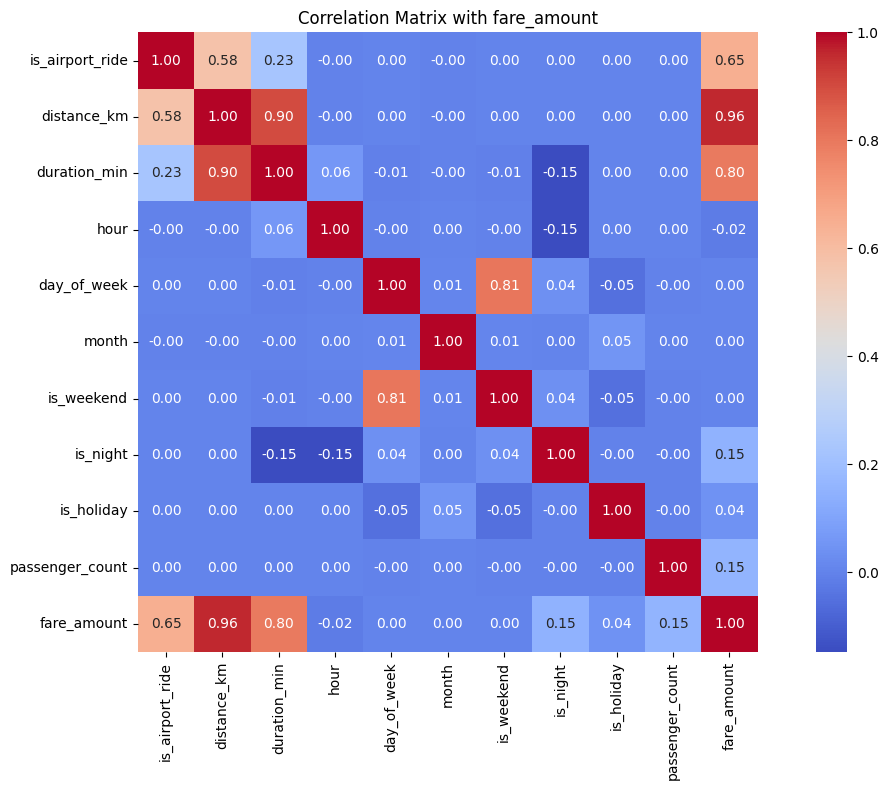

In [14]:
# Select numeric and binary features only
numeric_features = train_df.select_dtypes(include=['int64', 'float64', 'bool'])

# Compute correlations
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix with fare_amount")
plt.tight_layout()
plt.show()